Nama  : Razif Zulvikar Hatuwe

Judul : Proyek Sistem Rekomendasi

Id Dicoding : hazura


## Kaggle Download

1. `import kagglehub` mengimpor modul kagglehub, yang memungkinkan pengguna untuk mengunduh dataset dari Kaggle menggunakan API
2. `path = kagglehub.dataset_download(...)`, fungsi untuk mengunduh versi terbaru dari dataset. hasil unduhan akan di simpan pada variable path.
3. `print("Path to dataset files:", path)` berfungsi untuk melihat lokasi file dataset yang baru saja di unduh.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurav9786/amazon-product-reviews")

print("Path to dataset files:", path)

100%|██████████| 109M/109M [00:02<00:00, 39.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/saurav9786/amazon-product-reviews/versions/1


In [43]:
import pandas as pd
data = pd.read_csv('/root/.cache/kagglehub/datasets/saurav9786/amazon-product-reviews/versions/1/ratings_Electronics (1).csv')

# EDA

Kode ini mengimpor 3 pustaka Pyhton yang umum digunakan untuk analisis data dan visual:
1. `import pandas as pd`: Pustaka untuk manipulasi data. Pandas memungkinkan Anda untuk bekerja dengan struktur data seperti DataFrame, yang sangat berguna untuk mengolah dan menganalisis data dalam bhentuk tabel.
2. `import matplotlib.pyplot as plt`: Pustaka untuk membuat visualisasi data seperti grafik dan plot. plt sering digunakan untuk menggambarkan berbagai jenis grafik seperti grafik garis, bar chart, histogram, dan lain-lain.
3. `import seaborn as sns`: Pustaka berbasis matplotlib yang lebih fokus pada pembuatan visualisasi statistik yang lebih menarik dan informatif. Seaborn memudahkan pembuatan plot seperti heatmap, bloxplot, dan pairplot dengan pengaturan yang belih sederhana dan lebih estetis.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Perintah `data.head()` digunakan dalam pandas untuk menampilkan 5 baris pertama dari DataFrame yang disebut `data`. Ini berguna unuk melihat sekilas isi data yang sedang diproses.

In [45]:
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


Perintah `data.rename(columns={...})` digunakan untuk mengganti nama kolom dalam DataFrame `data`. Dalam contoh ini:
1. Kolom '`AKM1MP6P0OYPR`' diganti menjadi '`user_id`'.
2. Kolom '`0132793040`' diganti menjadi '`product_id`'.
3. Kolom '`5.0`' diganti menjadi '`Rating`'.
4. Kolom '`1365811200`' diganti menjadi '`timestamp`'.


In [46]:
data = data.rename(columns={
    'AKM1MP6P0OYPR': 'user_id',
    '0132793040': 'product_id',
    '5.0': 'Rating',
    '1365811200': 'timestamp'
})

Perintah `data.info()` digunakan untuk menampilkan informasi ringkas tentang DataFrame `data`. Seperti:
1. Jumlah total baris (entries).
2. jumlah kolom.
3. Nama - Nama kolom dan tipe data masing - masing kolom.
4. Jumlah nilai non - null (tidak kosong) di setiap kolom.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_id     object 
 1   product_id  object 
 2   Rating      float64
 3   timestamp   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


Perintah data.tail() digunakan untuk menampilkan 5 baris terakhir dari DataFrame data. ini berguna untuk memeriksa data yang berbeda bawah dataset.

In [48]:
data.tail()

,user_id,product_id,Rating,timestamp
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824480,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


Kode d`ata.isnull().sum()` digunakan untuk memeriksa jumlah nilai null atua kosong (missing values) pada setiap kolom dlam *DataFrame* `data`.
1. `isnull()`: Menghasilkan DataFrame dengan nilai True pada posisi yang mengandung nilai null dan False untuk posisi nilai non-null.
2. `sum()`: Menjumlahkan nilai True (yang dianggap sebagai 1) di setiap kolom, sehingga menghasilkan jumlah total dari nilai null di setiap kolom.

In [49]:
data.isnull().sum()

,0
user_id,0
product_id,0
Rating,0
timestamp,0


Kode `data.duplicated().sum()` digunakan untuk memeriksa jumlah baris duplikat dalam DataFrame data.
1. `duplicated()`: Menghasilkan Series dengan nilai True untuk setiap baris yang merupakan duplikat (baris yang sudah muncul sebelumnya dengan data yang sama persis) dan False untuk baris yang unik.
2. `sum()`: Menjumlahkan nilai True (yang dianggap sebagai 1), sehingga menghasilkan total jumlah baris duplikat dalam DataFrame.

In [50]:
data.duplicated().sum()

0

Perintah `data.sample(n=10000, random_state=42)` digunakan untuk mengambil sample acak sebanyak 10000 baris dari DataFrame `data`. Parameter yang digunakan:
1. `n=10000`: Menentukan jumlah sample yang ingin diambil (10000 baris).
2. `random_state=42`: Menentapkan nilai seed untuk generator angka acak, sehingga hasil sampel acak akan konsisten setiap kali kode dijalankan (reproducible).

In [ ]:
data = data.sample(n=10000, random_state=42)

## Visualisasi

### Distribusi Rating

Perintah ini digunakan untuk membuat plot distribusi dari kolom `Rating` dalam DataFrame `data`:
1. `plt.figure(figsize=(8, 6))`: Menentukan ukuran grafik, yaitu 8x6 inci.
2. `sns.histplot(data['Rating'], bins=5, kde=True, color='skyblue')`:
  - `histplot`: Membuat histogram untuk kolom `Rating`.
  - `bins=5`: Menentukan jumlah interval (bin) dalam histogram, disini ada 5 bin.
  - `kde=True`: Menambahkan Kernel Density Estimate (KDE) untuk melihat distribusi yang lebih halus.
  - `color='skyblue'`: Menentukan warna grafik menjadi biru muda.
3. `plt.tittle('Distribusi Rating')`: Menambahkan judul grafik.
4. `plt.xlabel('Rating')` dan` plt.ylabel('Frekuensi')`: Menambahkan label sumbu x dan y.
5. `plt.show()`: Menampilkan grafik yang telah dibuat.

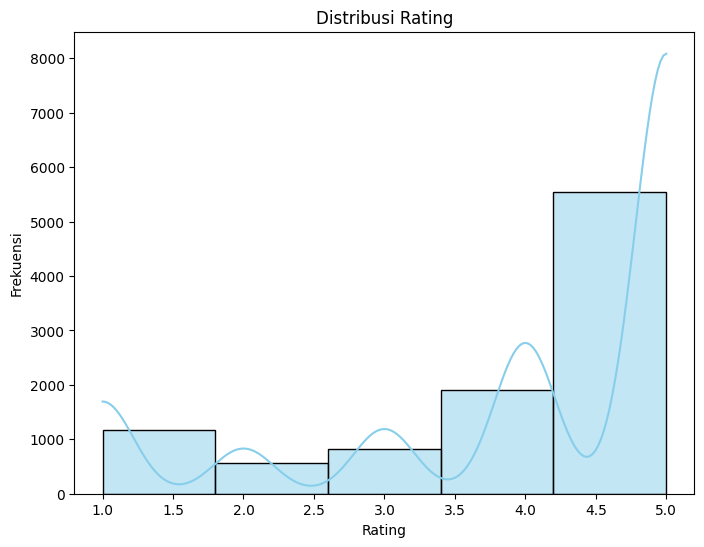

In [ ]:
# Plot distribusi rating
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=5, kde=True, color='skyblue')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()


Distribusi Rating: Menunjukkan apakah produk lebih banyak mendapatk rating 5.0 atau 1.0.

### Banyaknya Produk yang Di-review

Perintah `data['product_id'].value_counts() `digunakan untuk menghitung jumlah ulasan (reviews) yang diberikan untuk setiap produk berdasarkan kolom `product_id`. Hasilnya adalah sebuah seri (series) yang menunjukkan jumlah ulasan untuk setiap `product_id`, diurutan dari yang terbanyak.
1. `data['product_id']`: mengakses kolom `product_id` dalam DataFrame `data`.
2. `value_count()`: Menghitung frekuensi setiap nilai unik dalam kolom tersebut, yang dalam hal ini adalah jumlah ulasan per produk.

In [ ]:
# Menghitung jumlah ulasan per produk
product_review_count = data['product_id'].value_counts()

  Perintah ini digunakan untuk membuat grafik batang yang menampilkan 10 produk dengan jumlah ulasan terbanyak:
  1. `plt.figure(figsize=(10, 6))`: Menentukan ukuran grafik menjadi 10x6 inci.
  2. `product_review_count.head(10).plot(kind='bar', color='lightcoral')`:
    - `head(10)`: Mengambil 10 produk teratas dengan jumlah ulasan terbanyak.
    - `plot(kind='bar')`: membuat graik batang (bar chart).
    - `color='lightcoral'`: Menentukan warna batang menjadi merah muda terang.
  3. `plt.title('Top 10 Produk Dengan Jumlah Ulasan Terbanyak')`: Menambahkan judul grafik
  4. `plt.xlabel('Produk ID')` dan `plt.ylabel('Jumlah Ulasan')`: Menambahkan label pada sumbu x dan y
  5. `plt.xticks(rotation=45)`: Memutar label sumbu x (produk Id) sebesar 45 derajat agar lebih mudah dibaca.
  6. `plt.show()`: Menampilkan grafik.

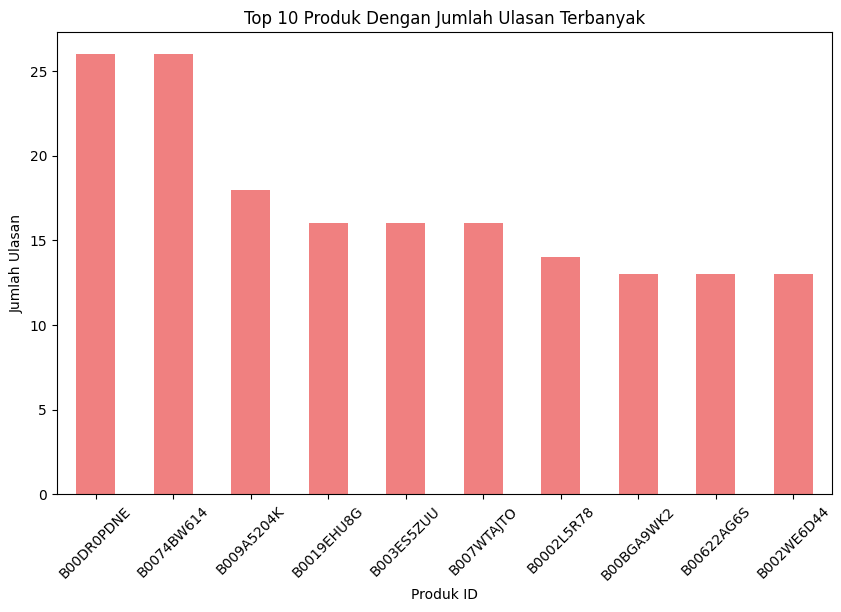

In [ ]:
# Plot 10 produk dengan jumlah ulasan terbanyak
plt.figure(figsize=(10, 6))
product_review_count.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Produk Dengan Jumlah Ulasan Terbanyak')
plt.xlabel('Produk ID')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=45)
plt.show()

Produk Terpopuler: Memberikan informasi tentang produk yang paling sering mendapatkan ulasan.

### Jumlah Ulasan per Pengguna

Perintah `data['user_id'].value_counts() `digunakan untuk menghitung jumlah ulasan yang diberikan oleh setiap pengguna berdasarkan kolom `user_id`. Hasilnya adalah sebuah seri (series) yang menunjukkan jumlah ulasan untuk setiap pengguna, diurutkan dari yang terbanyak.
1. `data['user_id']`: Mengakses kolom `user_id` dalam DataFrame `data`.
2. `value_counts()`: Menghitung frekuensi setiap nilai unik dalam kolom tersebut, yang dalam hal ini adalah jumlah ulasan yang dibuat oleh masing - masing pengguna.

In [ ]:
# Menghitung jumlah ulasan per pengguna
user_review_count = data['user_id'].value_counts()

Perintah ini digunakan untuk membuat grafik distribusi jumlah ulasan per pengguna:
1. `plt.figure(figsize=(10, 6))`: Menentukan ukuran grafik menjadi 10x6 inci.
2. `sns.histplot(user_review_count, bins=50, kde=True, color='lightgreen')`:
  - `user_review_count`: Data yang digunakan adalah jumlah ulasan per pengguna.
  - `bins=50`: Menentukan jumlah interval (bin) dalam histogram, di sini ada 50 bin.
  - `kde=True`: Menambahkan Kernel Density Estimate (KDE) untuk memperhalus distribusi.
  - `color='lightgreen'`: Menentukan warna grafik menjadi hijau muda.
3. `plt.title('Distribusi Jumlah Ulasan per Pengguna')`: Menambahkan judul grafik.
4. `lt.xlabel('Jumlah Ulasan')` dan `plt.ylabel('Frekuensi Pengguna')`: Menambahkan label pada sumbu x dan y.
5. `plt.xlim(0, 50)`: Membatasi sumbu x agar hanya menampilkan jumlah ulasan dari 0 hingga 50.
6. `plt.show()`: Menampilkan grafik.

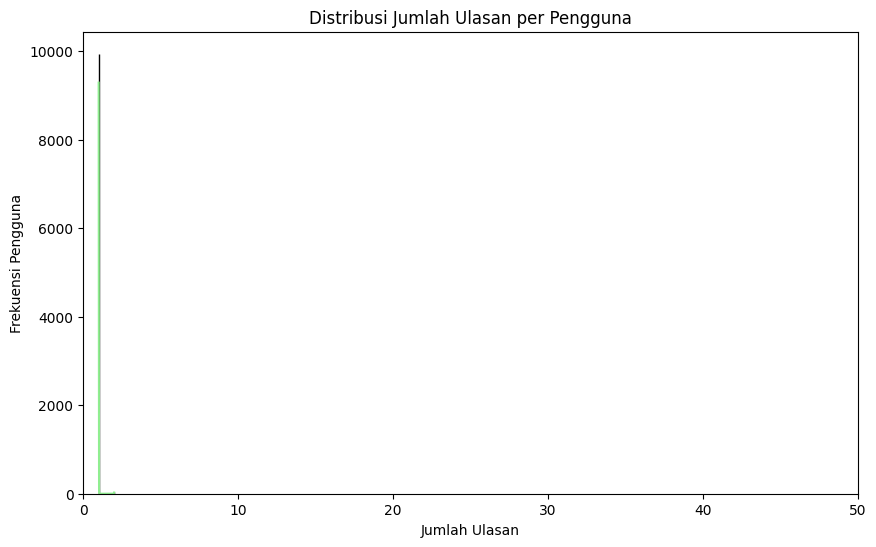

In [ ]:
# Plot distribusi jumlah ulasan per pengguna
plt.figure(figsize=(10, 6))
sns.histplot(user_review_count, bins=50, kde=True, color='lightgreen')
plt.title('Distribusi Jumlah Ulasan per Pengguna')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Frekuensi Pengguna')
plt.xlim(0, 50)
plt.show()

Pengguna Paling Aktif: Menunjukkan distribusi jumlah ulasan per pengguna.

### Analisis Tren Waktu

Perintah `data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')` digunakan untuk mengonversi kolom timestamp yang berisi data dalam format Unix Timestamp.
1. `pd.to_datetime()`: Fungsi dari pandas untuk mengonversi nilai menjadi objek datetime.
2. `data['timestamp']`: Mengakses kolom timestamp dalam DataFrame data.
3. `unit='s'`: Menyatakan bahwa nilai dalam kolom timestamp adalah dalam satuan detik (seconds)

In [ ]:
# Mengonversi timestamp menjadi format date time
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

Perintah `data['year'] = data['timestamp'].dt.year` digunakan untuk menambahkan kolom baru yang berisi tahun dari kolom `timestamp` yang sudah dikonversi ke format datetime.
1. `data['timestamp'].dt.year`: Mengakses bagian tahun dari kolom `timestamp` yang sudah dalam format datetime.
2. `data['year']`: Membuat kolom baru dalam DataFrame `data` untuk menyimpan nilai tahun.

In [ ]:
# Menambahkan kolom tahun untuk analisis tren waktu
data['year'] = data['timestamp'].dt.year

Perintah `data['year'].value_counts().sort_index() `digunakan untuk menghitung jumlah ulasan yang diberikan per tahun berdasarkan kolom `year`:
1. `data['year']`: Mengakses kolom `year` dalam DataFrame data `Inline code`, yang berisi tahun dari setiap entri ulasan.
2. `value_counts()`: Menghitung jumlah frekuensi (jumlah ulasan) untuk setiap tahun.
3. `sort_index()`: Mengurutkan hasil berdasarkan tahun (indeks), sehingga urutan hasilnya adalah dari tahun yang lebih awal ke yang lebih baru.

In [ ]:
# Menghitung jumlah ulasan per tahun
reviews_per_year = data['year'].value_counts().sort_index()

Perintah ini digunakan unuk membuat grafik garis yang menunjukkan jumlah ulasna per tahun:
1. `plt.figure(figsize=(10, 6))`: Menentukan ukuran grafik menjadi 10x6 inci.
2. reviews_per_year.plot(kind='line', marker='o', color='purple'):
  - `kind='line'`: Membuat grafik garis.
  - `marker='o'`: Menambakan marker berbentuk lingkaran pada setiap titik data.
  - `color='purple'`: Menentukan warna garis menjadi ungu.
3. `plt.title('Jumlah Ulasan per Tahun')`: Menambahkan judul grafik.
4. `plt.xlabel('Tahun')` dan `plt.ylabel('Jumlah Ulasan')`: Menambahkan label pada sumbu x dan y
5. `plt.show()`: Menampilkan Grafik

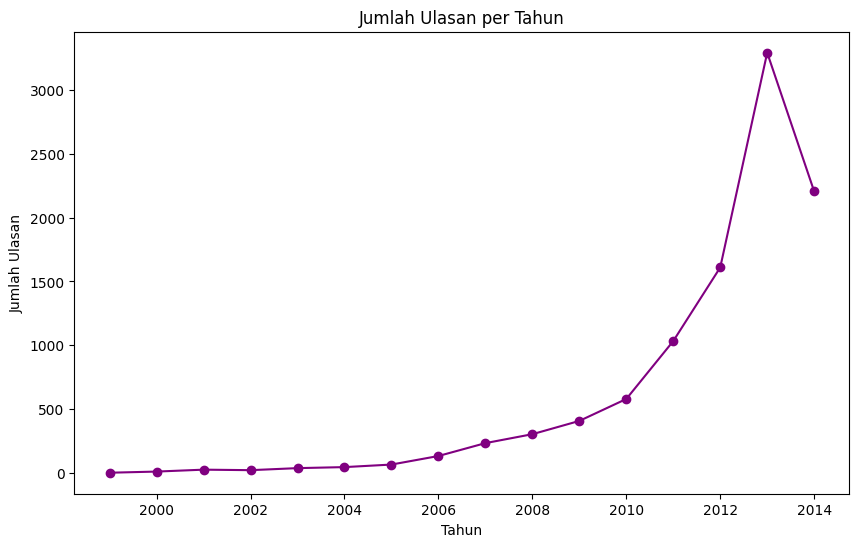

In [ ]:
# Plot jumlah ulasan per tahun
plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='line', marker='o', color='purple')
plt.title('Jumlah Ulasan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Ulasan')
plt.show()

Tren Waktu: Menggambarkan bagaimana jumlah ulasan berubah seiring waktu.

### Rata - rata rating per Produk

In [ ]:
# Menghitung rata - rata rating per produk
average_rating_per_product = data.groupby('product_id')['Rating'].mean()

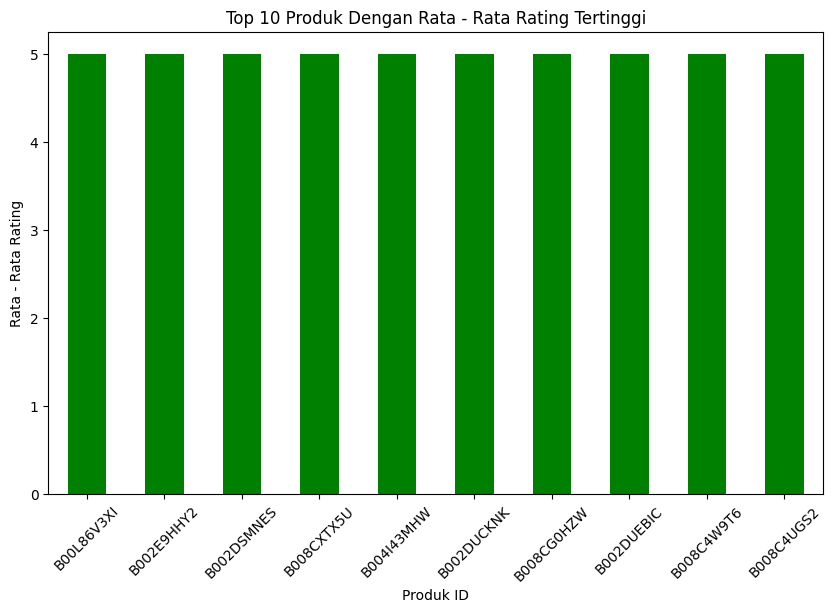

In [ ]:
# Plot 10 produk dengan rata - rata rating tertinggi
plt.figure(figsize = (10, 6))
average_rating_per_product.sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Top 10 Produk Dengan Rata - Rata Rating Tertinggi')
plt.xlabel('Produk ID')
plt.ylabel('Rata - Rata Rating')
plt.xticks(rotation=45)
plt.show()

Rata-rata Rating per Produk: Menunjukkan kualitas produk berdasarkan rating.

### Jumlah pengguna yang memberikan rating per Produk

Perintah `data.groupby('product_id')['user_id'].nunique()` digunakan untuk menghitung jumlah pengguna unik (distinct user) yang memberikan rating untuk setiap produk:
1. `data.groupby('product_id')`: Mengelompokkan data berdasarkan `product_id`, artinya setiap group akan mewakili satu produk.
2. `['user_id']`: Menyaring kolom `user_id` untuk menghitung jumlah pengguna.
3. `nunique()`: Menghitung jumlah nilai untuk dalam kolom `user_id` untuk setiap produk, yaitu jumlah pengguna yang memberikan rating untuk produk tersebut.

In [ ]:
# Menghitung jumlah pengguna yang memberikan rating per produk
product_user_counts = data.groupby('product_id')['user_id'].nunique()

Perintah ini digunakan untuk membuat grafik batang yang menampilkan 10 produk dengan jumlah pengguna terbanyak yang memberikan rating:
1. `plt.figure(figsize=(10, 6))`: Menentukan ukuran grafik menjadi 10x6 inci.
2. `product_user_counts.sort_values(ascending=False).head(10).plot(kind='bar', color='salmon')`:
  - `sort_values(ascending=False)`: Mengurutkan produk berdasarkan jumlah pengguna terbanyak (dari yang lebih banyak ke yang lebih sedikt).
  - `head(10)`: Mengambil 10 produk teratas dengan jumlah pengguna terbanyak yang memberikan rating.
  - `plot(kind='bar', color='salmon')`: Membuat grafik batang dengan warna salmon.
3.` plt.title('Top 10 Produk Dengan Jumlah Pengguna Terbanyak Yang Memberikan Rating')`: Menambahkan judul grafik.
4. `plt.xlabel('Produk ID')` dan p`lt.ylabel('Jumlah Pengguna')`: Menambahkan label pada sumbu x dan y.
5. `plt.xticks(rotation=45)`: Memutar label sumbu x (produk ID) sebesar 45 derajat agar lebih mudah dibaca.
6. `plt.show()`: Menampilkan grafik.


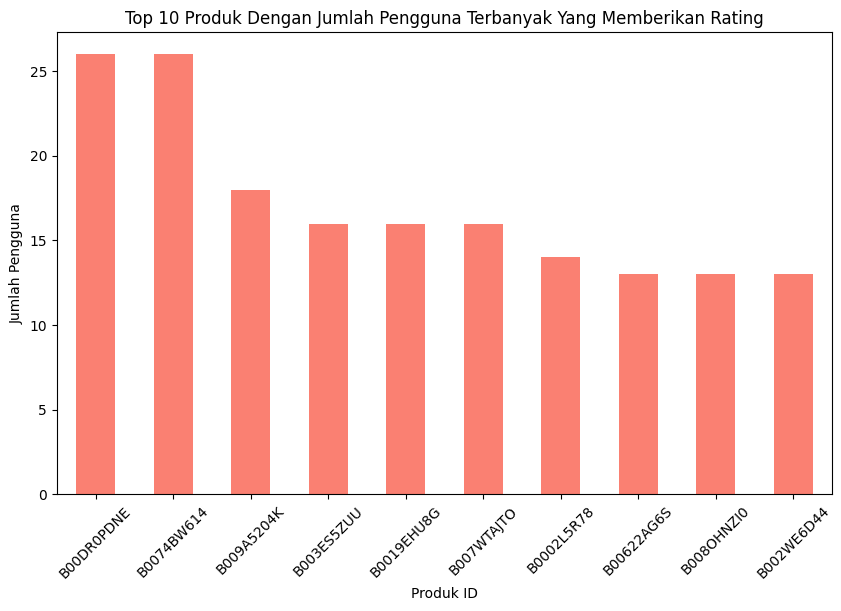

In [ ]:
# Plot 10 produk dengan jumlah pengguna terbanyak yang memberikan rating
plt.figure(figsize=(10, 6))
product_user_counts.sort_values(ascending=False).head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Produk Dengan Jumlah Pengguna Terbanyak Yang Memberikan Rating')
plt.xlabel('Produk ID')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

Pengguna yang Memberikan Rating Per Produk: Menunjukkan produk mana yang mendapat perhatian lebih banyak dari pengguna

# Model

## Library

In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357280 sha256=e01749646eacf10d6fce9a43e540512e1c4d9902ff8c32ac0c4e770a8518635b
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


Perintah yang anda tulis mengimpor pustaka dan fungsi yang digunakan untuk evaluasi dan memangun model sistem rekomendasi:
1. `from sklearn.metrics import mean_squared_error, mean_absolute_error`:
  - `mean_squared_error`: Fungsi untuk menghitung **Mean Suared Error (MSE)**, yang digunakan untuk mengukur seberapa jauh prediksi model dari nilai asli (semakin kecil, semakin baik).
  - `mean_absolute_error`: Fungsi untuk menghitung **Mean Absolute Error (MAE)**, yang juga digunakan untuk mengukur seberapa jauh prediksi model dari nilai asli, namun dalam satuan yang sama dengan data (nilai absolut dari perbedaan antara nilai yang diprediksi dan yang sebenarnya).
2. `from surprise import Dataset, Reader, KNNBasic`:
  - `Dataset`: Digunakan untuk memuat data dalam format yang dapat digunakan oleh pustaka `suprise` untuk sistem rekomendasi.
  - `Reader`: DIgunakan untuk mendefinisikan format data input, misalnya rating yang diberikan oleh pengguna pada produk.
  - `KNNBasic`: Salah satu algoritma berbasis **k-nearest neighbors (KNN)** yang digunakan untuk membangun model rekomendasi berbasis kesamaan (similarity) antar pengguna tau produk.
3. `from surprise.model_selection import train_test_split`:
  - `train_test_split`: Fungsi untuk membagi data menjadi set pelatihan (training) dan pengujian (testing), yang digunakan untuk melatihmodel yangm enguji performanya.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Dataset, Reader, KNNBasic, SVD, accuracy
from surprise.model_selection import train_test_split

## Model Collaborative Filtering (KNN)

### Data Prep

Perintah yang Anda berikan digunakan untuk mempersiapkan data digunakan dalam pustaka Suprise, yang umum digunakan untuk membangun sistem rekomendasi berbasis collaborative filtering:
1. ` reader = Reader(rating_scale=(1, 5))`:
  - Membuat objek Reader yang mendefinisikan tentang nilai raitn gyand digunakan dalam data, yaitu antara 1 dan 5. Ini memberi tahu pustaka Suprise bahwa rating yang ada dalam data berada dalam rentang ini.
2. `surprise_data = Dataset.load_from_df(data[['user_id', 'product_id', 'Rating']], reader)`:
  - Mengguakan fungsi `load_from_df` untuk memuat `data` dari DataFrame data yang terdiri dari tiga kolom: `user_id`, `product_id`, dan `Rating`.
  - Fungsi ini mengonversi DataFrame ke dalam format yang dapat diproses oleh pustaka Surprise.
3. `trainset, testset = train_test_split(surprise_data, test_size=0.2)`:
  - `train_test_split`: Membagi data menjadi dua bagian: training set (80% dari data) data test set (20% dari data).
  - `test_size=0.2`: Menentukan proporsi data yang digunakan untuk testing (20%).
  - Hasil adalah dua variabel: `trainset` untuk pelatihan model, dan `testset` untuk menguji model setelah dilatih.

In [ ]:
# Menyiapkan data untuk Surprise
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data[['user_id', 'product_id', 'Rating']], reader)
trainset, testset = train_test_split(surprise_data, test_size=0.2)

### Model KNN

#### 1. Model User-to-user Collaborative Filtering

Kode ini mengimplementasikan algoritma **collaborative filtering** berbasis user-user menggunakan KNN (K-Nearest Neighbors).
1. `KNNBasic(sim_options={'name': 'cosine', 'user_based': True})`: Menggunakan algoritma KNN dengan metrik kemiripan cosine dan pengaturan `user_based=True`, yang berarti algoritma ini melakukan filtering berdasarkan kemiripan antar pengguna (*user-user*).
2. `user_user_algo.fit(trainset)`: Melatih model pada dataset latih (`trainset`). Model akan mempelajari pola preferensi pengguna berdasarkan data tersebut.
3. `user_user_algo.test(testset)`: Menguji model pada dataset `(testset)` untuk menghasilkan prediksi rekomendasi bagi setiap pasangan pengguna-item. Hasilnya adalah daftar *rating* yang diprediksi untuk item tertentu, berdasarkan preferensi pengguna yang mirip.


In [ ]:
# Model User-to-User Collaborative Filterin
user_user_algo = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
user_user_algo.fit(trainset)
user_user_predictions = user_user_algo.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


#### 2. Model Product-to-product Collaborative Filtering

Kode ini mengimplementasikan algoritma **collaborative filtering** berbasis produk-produk menggunakan KNN (K-NEarest Neighbors).
1. `KNNBasic(sim_options={'name': 'cosine', 'user_based': False})`: Menggunakan algoritma KNN dengan metrik kemiripan cosine dan pengaturan `user_based=False`, yang artinya algoritma ini bekerja berdasarkan kemiripan antar produk, bukan antar pengguna (*item-item filteirng*).
2. `product_product_algo.fit(trainset)`: Melatih model dengan dataset latih (`trainset`). Model ini mempelajari pola kemiripan antar produk berdasarkan kesamaan dalam *rating* dari pengguna.
3. `product_product_algo.test(testset)`: Menguji model pada dataset `testset` untuk menghasilkan prediksi *rating* bagi pasangan pengguna-produk. Prediksi ini merekomendasikan produk serupa yang pernah dinilai atau disukai pengguna lain yang menilai produk serupa.


In [ ]:
# Model Product-to-Product Collaborative Filtering
product_product_algo = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
product_product_algo.fit(trainset)
product_product_predictions = product_product_algo.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


### Evaluasi Model KNN

#### User-to-user Collaborative Filter

Kode berikut menghitung RMSE (Root Mean Squared Error) dan MAE (Mean Absolute Error) untuk model User-to-User Collaborative Filtering.
1. `mean_squared_error([pred.r_ui for pred in user_user_predictions], [pred.est for pred in user_user_predictions], squared=False)`:
  - **RMSE** dihitung dari perbedaan antara nilai akutal (`r_ui`) dan nilai prediksi (`est`) untuk setiap prediksi di *user_user_predictions*.
  - `squared=False` memastikan bahwa nilai yang dikembalikan adalah akar dari *mean squared error*, yang memberikan RMSE.
2. `mean_absolute_error([pred.r_ui for pred in user_user_predictions], [pred.est for pred in user_user_predictions])`:
  - **MAE** dihitung dari rata-rata absolut dari perbedaan antara nilai aktual (r_ui) dan nilai prediksi (est).
3. `print(f'User-to-User RMSE: {user_user_rmse:.4f}')` dan print `(f'User-to-User MAE: {user_user_mae:.4f}')`:
 - Menampilkan hasil perhitungan **RMSE** dan **MAE** dengan 4 angka dibelakang koma yang menunjukkan seberapa akurat model dalam memprediksi *rating* pengguna.

In [ ]:
# Menghitung RMSE dan MAE untuk model User-to-User
user_user_rmse = mean_squared_error([pred.r_ui for pred in user_user_predictions], [pred.est for pred in user_user_predictions], squared=False)
user_user_mae = mean_absolute_error([pred.r_ui for pred in user_user_predictions], [pred.est for pred in user_user_predictions])

print(f'User-to-User RMSE: {user_user_rmse:.4f}')
print(f'User-to-User MAE: {user_user_mae:.4f}')

User-to-User RMSE: 1.3477
User-to-User MAE: 1.0700


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Product-to-product Collaborative Filtering

Kode di atas menghitung **RMSE (Root Mean Squared Error)** dan **MAE (Mean Absolute Error)** untuk model *Product-to-Product Collaborative Filtering*.
1. `mean_squared_error([pred.r_ui for pred in product_product_predictions], [pred.est for pred in product_product_predictions], squared=False)`:
  - **RMSE** dihitung dengan membandingkan nilai aktual (`r_ui`) dengan nilai prediksi (`est`) dari setiap prediksi dalam product_product_predictions.
  - `squared=False` memastikan hasilnya adalah akar dari *mean squared error*, sehingga memberikan nilai RMSE.
2. `mean_absolute_error([pred.r_ui for pred in product_product_predictions], [pred.est for pred in product_product_predictions])`:
  - **MAE** dihitung sebagai rata-rata perbedaan absolut antara nilai aktual (`r_ui`) dan nilai prediksi (`est`).
3. `print(f'Product-to-Product RMSE: {product_product_rmse:.4f}')` dan print`(f'Product-to-Product MAE: {product_product_mae:.4f}')`:
  - Menampilkan nilai RMSE dan MAE dengan 4 angka di belakang koma. Hasil ini menunjukkan tingkat akurasi model dalam memprediksi *rating* produk.


In [ ]:
# Menghitung RMSE dan MAE untuk model Product-to-Product
product_product_rmse = mean_squared_error([pred.r_ui for pred in product_product_predictions], [pred.est for pred in product_product_predictions], squared=False)
product_product_mae = mean_absolute_error([pred.r_ui for pred in product_product_predictions], [pred.est for pred in product_product_predictions])

print(f'Product-to-Product RMSE: {product_product_rmse:.4f}')
print(f'Product-to-Product MAE: {product_product_mae:.4f}')

Product-to-Product RMSE: 1.3477
Product-to-Product MAE: 1.0700


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Menguji Model KNN

Kode ini menyiapkan data untuk menguji rekomendasi bagi pengguna tertentu (`test_user_id`) dengan langkah-langkah sebagai berikut:
1. `test_user_id = 'A2WNBOD3WNDNKT'`:
  - Menetapkan `test_user_id` sebagai `'A2WNBOD3WNDNKT'`, yaitu ID pengguna yang akan diuji untuk mendapatkan rekomendasi produk.
2. `all_products = data['product_id'].unique()`:
  - Mengambil semua produk unik dalam dataset (`data`) dan menyimpannya di `all_products`. Ini akan memberikan daftar produk yang tersedia, yang kemudian bisa direkomendasikan kepada pengguna `test_user_id`.


In [ ]:
# Uji coba rekomendasi untuk user_id
test_user_id = 'A2WNBOD3WNDNKT'
all_products = data['product_id'].unique()

#### User-to-user Collaborative Filtering

Kode ini memprediksi rating yang diharapkan untuks etiap produk bagi pengguna tertentu (`test_user_id`) menggunakan model User-to-User Collaborative Filtering.
1. `user_recommendations = []`:
  - Membuat daftar kosong `user_recommendations` untuk menyimpan pasangan produk dan prediksi *rating*.
2. `for product_id in all_products:`:
  - Melakukan iterasi pada setiap `product_id` yang ada di `all_rpducts`, yaitu daftar semua produk unik.
3. `pred = user_user_algo.predict(test_user_id, product_id)`:
  - Menggunakan model User-to-User (`user_user_algo`) untuk memprediksi *rating* pengguna (`test_user_id`) terhadap produk saat ini (`product_id`). Hasil prediksi disimpan dalam `pred`, yang mencakup nilai estimasi *rating* dalam `pred.est`.
4. `user_recommendations.append((product_id, pred.est))`:
  - Menambahkan pasangan (`producat_id, pred.est`) ke daftar `user_recommendations`. Di sini, `product_id` adalah Id produk dan `pred.est` adalah *rating* yang dirpediksi oleh model.

In [ ]:
# Prediksi rating untuk setiap produk menggunakan model User-to-User
user_recommendations = []
for product_id in all_products:
    pred = user_user_algo.predict(test_user_id, product_id)
    user_recommendations.append((product_id, pred.est))

Kode berikut mengurutkan dan menampilkan 5 rekomendasi produk terbaik untuk pengguna tertentu (`test_user_id`) berdasrkan rating yang diprediksi menggunakan model U*ser-to-User Collaborative Filtering*.
1. `user_recommendations = sorted(user_recommendations, key=lambda x: x[1], reverse=True)`:  
  - Mengurutkan `user_recommendations` berdasarkan nilai rating yang diprediksi (elemen kedua dalam tuple) dalam urutan menurun (`reverse=True`), sehingga produk dengan rating tertinggi berada di posisi awal.
2. `print("Top 5 User-to-User Recommendations for user A2WNBOD3WNDNKT:")`:
  - Menampilkan judul untuk hasil rekomendasi.
3. `for product_id, rating in user_recommendations[:5]:`:
  - Melakukan iterasi pada 5 produk teratas dalam daftar `user_recommendations` yang sudah diurutkan.
4. `print(f'Product: {product_id}, Predicted Rating: {rating:.2f}')`:
  - Menampilkan setiap produk dan raing prediksi dalam format yang rapi, dengan rating dibulatkan hingga dua desimal.

In [ ]:
# Urutkan rekomendasi berdasarkan prediksi rating
user_recommendations = sorted(user_recommendations, key=lambda x: x[1], reverse=True)

# Menampilkan top 5 rekomendasi User-to-User untuk user_id
print(f"Top 5 User-to-User Recommendations for user {test_user_id}:")
for product_id, rating in user_recommendations[:5]:  # Hanya menampilkan 5 rekomendasi teratas
    print(f'Product: {product_id}, Predicted Rating: {rating:.2f}')

Top 5 User-to-User Recommendations for user A2WNBOD3WNDNKT:
Product: B000M9ISQ2, Predicted Rating: 4.00
Product: B002L6HE9G, Predicted Rating: 4.00
Product: B007MXGG5Q, Predicted Rating: 4.00
Product: B008HOEDYU, Predicted Rating: 4.00
Product: B0069R7TAM, Predicted Rating: 4.00


#### Product-to-product Collaborative Filtering

Kode ini memprediksi *rating* untuk setiap produk bagi pengguna tertentu (`test_user_id`) menggunakan model *Product-to-Product Collaborative Filtering*.
1. `product_recommendations = []`:
  - Membuat daftar kosong product_recommendations untuk menyimpan pasangan produk dan prediksi *rating*.
2. `for product_id in all_products:`:
  - Melakukan iterasi pada setiap `product_id` dalam `all_products`, yaitu daftar semua produk unik.
3. pred = product_product_algo.predict(test_user_id, product_id):
  - Menggunakan model *Product-to-Product* (`product_product_algo`) untuk memprediksi *rating* yang diharapkan dari pengguna (`test_user_id`) untuk produk saat ini (`product_id`). Prediksi ini disimpan dalam `pred`, yang berisi nilai estimasi *rating* dalam `pred.est`.
4. `product_recommendations.append((product_id, pred.est))`:
  - Menambahkan pasangan `(product_id, pred.est)` ke dalam daftar product_recommendations, di mana `product_id` adalah ID produk dan `pred.est` adalah nilai *rating* yang diprediksi oleh model.

In [ ]:
# Prediksi rating untuk setiap produk menggunakan model Product-to-Product
product_recommendations = []
for product_id in all_products:
    pred = product_product_algo.predict(test_user_id, product_id)
    product_recommendations.append((product_id, pred.est))

Kode ini mengurutkan dan menampilkan 5 rekomendasi produk terbaik untuk pengguna tertentu (`test_user_id`) berdasarkan *rating* yang diprediksi menggunakan model *Product-to-Product Collaborative Filtering*.
1. `product_recommendations = sorted(product_recommendations, key=lambda x: x[1], reverse=True)`:
  - Mengurutkan `product_recommendations` berdasarkan nilai *rating* yang diprediksi (elemen kedua dalam tuple) dalam urutan menurun (`reverse=True`), sehingga produk dengan *rating* tertinggi berada di urutan awal.
2.` print("Top 5 Product-to-Product Recommendations for user A2WNBOD3WNDNKT:")`:
  - Menampilkan judul untuk hasil rekomendasi.
3. `for product_id, rating in product_recommendations[:5]:`:
  - Melakukan iterasi pada 5 produk teratas dalam daftar `product_recommendations` yang telah diurutkan.
4. `print(f'Product: {product_id}, Predicted Rating: {rating:.2f}')`:
  - Menampilkan ID produk dan *rating* prediksi dalam format yang rapi, dengan *rating* dibulatkan hingga dua desimal.

In [ ]:
# Urutkan rekomendasi berdasarkan prediksi rating
product_recommendations = sorted(product_recommendations, key=lambda x: x[1], reverse=True)

# Menampilkan top 5 rekomendasi Product-to-Product untuk user_id
print(f"Top 5 Product-to-Product Recommendations for user {test_user_id}:")
for product_id, rating in product_recommendations[:5]:  # Hanya menampilkan 5 rekomendasi teratas
    print(f'Product: {product_id}, Predicted Rating: {rating:.2f}')

Top 5 Product-to-Product Recommendations for user A2WNBOD3WNDNKT:
Product: B000M9ISQ2, Predicted Rating: 4.00
Product: B002L6HE9G, Predicted Rating: 4.00
Product: B007MXGG5Q, Predicted Rating: 4.00
Product: B008HOEDYU, Predicted Rating: 4.00
Product: B0069R7TAM, Predicted Rating: 4.00


# Model Collaborative Filtering (SVD)

## Model SVD

Kode di bawah `svd_model = SVD()` berfungsi untuk membuat objek model menggunakan algoritma Singular Value Decomposition (SDV), yang umum digunakan dalam collaborative filtering untuk sistem rekomendasi.

In [ ]:
# Menggunakan algoritma SVD
svd_model = SVD()

Kode `svd_model.fit(trainset)` befrungsi untuk melatih model SVD dengan data latih yang disediakan dalam variabel `trainset`. Ketika metode `fit()` dipanggil, model akan mempelajari pola dalam data, khususnya berhubungan antara pengguna dan item, serta nilai rating mereka.

In [ ]:
# Melatih model dengan data latih
svd_model.fit(trainset)

## Evaluasi Model SVD

Kode dibawah melakukan prediksi rating untuk data uji menggunakan model SVD yang telah dilatih.
1. `predictions =`: Variabel `predictions` diguanakn untuk menyimpan hasil prediksi dari model.
2. `svd_model.test(testset)`: Metode `.test()` digunakan untuk membuat prediksi berdasarkan testset yang diberikan, yang berisi pasangan (atau triplet) pengguna-item-rating yang belum dilihat oleh mode. Metode ini mengembalikan daftar prediksi untuk setiap item di `testset`, yang bisa berupa rating yang diharapkan atau skor relevansi lainnya.


In [ ]:
# Memprediksi data uji
predictions = svd_model.test(testset)

Kode berikut digunakan untuk menghitung metrik error *Root mean Square Error* (RMSE) dan *Mean Absolute Error* (MAE) dari prediksi yang telah dilakukan oleh model.
1. `rmse = accuracy.rmse(predictions)`: Baris ini menghitung nilai RMSE antara rating yang diprediksi oleh model dan rating sebenarnya dalam `predictions`. RMSE mengukur seberapa jauh prediksi dari nilai sebenarnya secara rata-rata dalam satuan akar kuadrat dari kuadrat perbedaan, yang sensitif terhadap error yang besar.
2. `mae = accuracy.mae(predictions)`: Baris ini menghitung nilai MAE antara rating yang diprediksi dan rating sebenarnya dalam `predictions`. MAE mengukur rata-rata selisih absolut antara prediksi dan nilai sebenarnya, memberikan penilaian langsung atas ketepatan prediksi model.


In [ ]:
# Menghitung RMSE dan MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 1.3408
MAE:  1.0659


## Menguji Model SVD

Kode dibawah digunakan untuk melihat produk-produk yang telah diberikan rating oleh pengguna dengan `user_id` tertentu. Beriktu penjelasannya.
1.` rated_items =`: Variabel `rated_items` akan menyimpan hasil berupa daftar produk yang sudah dirating oleh pengguna dengan `user_id` tertentu.
2. `data[data['user_id'] == 'A322MDK0M89RHN']`: Bagian ini melakukan filtering pada *dataframe* `data` untuk memilih baris-baris di mana nilai `user_id` adalah `'A322MDK0M89RHN'`.
3. `['product_id'].unique()`: Setelah baris-baris dengan `user_id` tertentu dipilih, kode ini mengambil kolom `product_id` dan mencari nilai yang unik (tanpa duplikasi), sehingga hanya produk yang pernah dirating oleh pengguna tersebut yang tersisa.

In [ ]:
# Melihat produk yang sudah dirating oleh user_id = "A322MDK0M89RHN"
rated_items = data[data['user_id'] == 'A322MDK0M89RHN']['product_id'].unique()

Kode ini digunakan untuk mendapatkan daftar produk yang belum dirating oleh pengguna tertentu.
1. `all_items = data['product_id'].unique()`:  Baris ini mengambil semua ID produk unik dari kolom `product_id` dalam *dataframe* `data`. Variabel `all_items` berisi daftar semua produk yang ada dalam dataset tanpa duplikasi.
2.` unrated_items = [item for item in all_items if item not in rated_items]`: Baris ini membuat daftar produk yang belum dirating oleh pengguna terntetu. dengan melakukan *list comprehension*, kode ini memeriksa setiap item dalam `all_items` dan menambahkan item ke `unrated_items` jika item tersebut tidak ada dalam `rated_items` (produk yang sudah dirating oleh pengguna tersebut).

In [ ]:
# Produk yang belum dirating oleh user
all_items = data['product_id'].unique()
unrated_items = [item for item in all_items if item not in rated_items]

Kode dibawah ini digunakan untuk membaut prediksi rating dari semua produk yang belum dirating oleh pengguna tertentu dan menyimpannya sebagai rekomendasi.
1. `recommendations = []`: Baris ini menginisialisasi daftar kosong `recommendations`, yang akan menyimpan hasil prediksi rating untuk produk yang belum dirating oleh pengguna.
2. `for item_id in unrated_items:`: Baris ini memulai loop untuk setiap `item_id` dalam daftar `unrated_items`, yaitu produk-produk yang belum dirating oleh pengguna.
3. `pred = svd_model.predict('A2WNBOD3WNDNKT', item_id)`: Pada setiap iterasi, kode ini menggunakan metode `.predict()` dari `svd_model` untuk memprediksi rating pengguna dengan `user_id` tertentu (dalam hal ini `'A2WNBOD3WNDNKT'`) pada `item_id`. hasil prediksi disimpan dalam variable `pred`.
4. `recommendations.append((item_id, pred.est))`: Baris ini menambahkan pasangan (`item_id`, `pred.est`) kedalam daftar `recommendations`.`pred.est` adalah nilai prediksi rating yang dihasilkan oleh model.


In [ ]:
# Membuat prediksi untuk semua item yang belum dirating
recommendations = []
for item_id in unrated_items:
    pred = svd_model.predict('A2WNBOD3WNDNKT', item_id)
    recommendations.append((item_id, pred.est))

Kode berikut mengurutkan daftar rekomendasi berdasarkan prediksi rating tertinggi dan menampilkan 5 rekomendasi teratas untuk pengguna tertentu.
1. `user_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)`: Baris ini mengurutkan daftar `recommendations` berdasarkan prediksi rating (`x[1]`) dalam urutan menurun (`reverse=True`). hasilnya disimpan di `user_recommendations`, dengna item berprediksi rating tinggi di posisi awal.
2. `test_user_id = "A2WNBOD3WNDNKT"`: Variable ini menimpan ID pengguna yang akan diberikan rekomendasi, yang dalam contoh ini adalah `"A2WNBOD3WNDNKT"`.
3. `print(f"Top 5 User-to-User Recommendations for user {test_user_id}:")`: Baris ini menampilkan teks yang menunjukkan rekomendasi untuk pengguna tertentu, dengan menyisipkan `test_user_id`.
4. `for product_id, rating in user_recommendations[:5]:`: Baris ini melakukan iterasi pada lima rekomendasi teratas dalam `user_recommendations`.
5. `print(f'Product: {product_id}, Predicted Rating: {rating:.2f}')`: Baris ini menampilkan ID produk dan prediksi rating yang diestimasikan untuk produk tersebut, dengan dua angka desimal.


In [ ]:
# Mengurutkan rekomendasi berdasarkan prediksi rating tertinggi
user_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

# Menampilkan top 5 rekomendasi User-to-User untuk user_id
test_user_id = "A2WNBOD3WNDNKT"
print(f"Top 5 SVD Model Recommendations for user {test_user_id}:")
for product_id, rating in user_recommendations[:5]:  # Hanya menampilkan 5 rekomendasi teratas
    print(f'Product: {product_id}, Predicted Rating: {rating:.2f}')

Top 5 SVD Model Recommendations for user A2WNBOD3WNDNKT:
Product: B003ES5ZUU, Predicted Rating: 4.58
Product: B0002L5R78, Predicted Rating: 4.55
Product: B0019EHU8G, Predicted Rating: 4.54
Product: B000S5Q9CA, Predicted Rating: 4.53
Product: B00622AG6S, Predicted Rating: 4.50
